    Beginning the Regression Preparation

In [1]:

import pandas as pd

Building a MultiVariate Regression Model taking in Drug Claim Counts

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor as SGDR
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option("display.max_columns", 150) #increase column options

In [3]:
ML_dataset = pd.read_csv("data\ML_dataset.csv")

In [4]:
ML_dataset.head()

,specialty_description,nppes_provider_city,total_claim_count,total_drug_cost,total_day_supply,total_30_day_fill_count,bene_count,brand_percent_spending
0,39,9174,1946,140189.01,58605,2054.8,276.0,0.756466
1,108,9331,90,7561.21,2681,110.0,11.0,0.869739
2,32,8930,200,14549.85,7587,307.2,65.0,0.535970
3,70,3003,4981,258258.70,337309,11494.1,459.0,0.567573
4,88,7343,7165,379661.02,333309,11406.5,461.0,0.724479




Begin Model Building and Fitting

Input and Output

In [5]:
Labels = ML_dataset.drop("brand_percent_spending", axis=1).columns.tolist() #columns of drugs
print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count', 'bene_count']


In [6]:
X = ML_dataset[Labels]
y = ML_dataset["brand_percent_spending"]


PCA Feature Selection

In [7]:
X = StandardScaler().fit_transform(X)

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
PCA = PCA(n_components = 'mle')
PCA.fit_transform(X)

array([[-0.28899275, -0.78519844,  1.38468074,  0.18266722,  0.50352134,
         0.15765195],
       [-1.4178003 ,  0.75429729,  0.29012323, -0.22395594, -0.47586673,
        -0.01680797],
       [-1.2536289 , -1.05672808,  1.35747392,  0.42268504, -0.02429186,
        -0.01668494],
       ...,
       [-1.36959506,  1.67015776, -0.23601103, -0.61449982, -0.49208228,
         0.00609373],
       [-1.33554674,  0.52908316,  0.44945876, -0.16298418, -0.35669675,
        -0.00727799],
       [-1.23655152,  0.5861791 ,  0.19267411, -0.27147188, -0.23553832,
         0.01997777]])

In [9]:
print(PCA.explained_variance_)  

[3.98344151 1.11966348 0.95046821 0.5165188  0.35340836 0.07321407]


Splitting Data into Test and Train

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train


Fit data into Lasso/L1 Model

In [12]:

regressor = SGDR()
regressor.fit(X_train, y_train)

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

Coefficients of Model

In [13]:
print(len(regressor.coef_))

7


In [14]:
coeff_df = pd.DataFrame( regressor.coef_ , Labels, columns=['Coefficient'])  
coeff_df = coeff_df[coeff_df["Coefficient"] != 0]
coeff_df.sort_values("Coefficient" ,ascending = False) #Coefficients for each feature used

,Coefficient
specialty_description,0.086470
total_day_supply,0.061144
total_drug_cost,0.054202
nppes_provider_city,0.013283
total_claim_count,-0.016929
bene_count,-0.027512
total_30_day_fill_count,-0.036520


Predictions

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25) #Actual Vs Predicted Dataframe

,Actual,Predicted
328235,0.784958,0.648581
90712,0.959964,0.891098
408838,0.807232,0.695488
236969,0.574822,0.727888
30566,0.947439,0.802971
238172,0.389186,0.727584
448091,0.599098,0.674633
440517,0.321220,0.534128
172473,0.655440,0.729130
274597,0.400443,0.692513


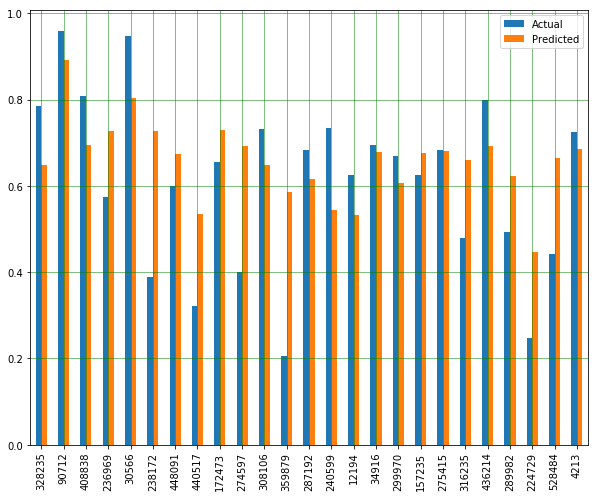

In [17]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

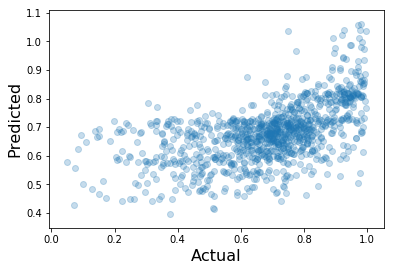

In [18]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

Statistics

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 0.13124383502060652
Mean Squared Error: 0.02975706243775941


In [20]:
print("r Squared:", metrics.r2_score(y_test, y_pred))
rsq = metrics.r2_score(y_test, y_pred)

r Squared: 0.26945890031839803


In [21]:
metrics_df = pd.read_csv("data\metrics_df.csv")

In [ ]:
metrics_df = metrics_df.append({"Input": Labels, "R Squared": rsq, "Mean Absolute Error": mae, "Mean Squared Error": mse, "Model": "Lasso Linear"}, ignore_index=True)

In [ ]:
metrics_df.tail()

In [ ]:
metrics_df.to_csv("data\metrics_df.csv", index = False)

Save Weights

In [ ]:
from sklearn.externals.joblib import dump,load

In [ ]:
dump(regressor, "Model_Weights\L1\Lasso_trainedModel") 